### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear teniendo como target la columna "duración". Es decir, averigua cuánto aumenta o disminuye la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [27]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [5]:
df = pd.read_csv("../data/usuarios_win_mac_lin.csv")
df

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


array([[<AxesSubplot:title={'center':'duracion'}>,
        <AxesSubplot:title={'center':'paginas'}>],
       [<AxesSubplot:title={'center':'acciones'}>,
        <AxesSubplot:title={'center':'valor'}>],
       [<AxesSubplot:title={'center':'clase'}>, <AxesSubplot:>]],
      dtype=object)

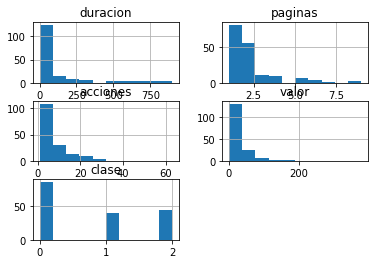

In [19]:
df.hist()

In [7]:
y = df["duracion"]

In [8]:
df.columns

Index(['duracion', 'paginas', 'acciones', 'valor', 'clase'], dtype='object')

In [9]:
X = df[['paginas', 'acciones', 'valor', 'clase']]

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [13]:
lm = LinearRegression(n_jobs=-1) 

In [14]:
lm.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [16]:
print(lm.intercept_)
lm.coef_ 

2.812709860357856


array([56.74966999, -1.43283941, -0.49629566, 32.02178994])

In [17]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
paginas,56.749670
acciones,-1.432839
valor,-0.496296
clase,32.021790


### -Cuando las páginas aumentan una unidad la duración lo hace en 56.749
### -Si las acciones aumentan en una unidad la duración disminuye 1.43
### -Si el valor aumenta en una unidad la duración disminuye 0.49
### - Si pasamos de una clase a otra superior la duración aumenta  en 32.02

In [31]:
lm.score(X_test, y_test) *100


0.6761052940610801

In [23]:
predictions = lm.predict(X_test)

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 158.38316344920452
MSE: 55992.83722550593
RMSE: 236.6280567166665


<AxesSubplot:>

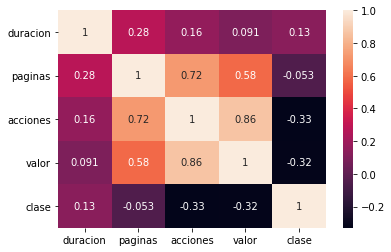

In [28]:
sns.heatmap(df.corr(), annot=True)

### No tendría sentido ya que segun la matriz todas las variables tienen correlación positiva con la duración, lo que querría decir que ambas deberían aumentar a la vez y el modelo establece correlaciones negativas. Por lo que la regresión no es un buen método para este dataset
